# Exploratory Data Analysis

### Importing Libraries

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt

### Importing the data

In [48]:
df = pd.read_csv('../data/customer_segmentation_data.csv')

In [50]:
df.head()

id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08

In [54]:
df.shape

(1000, 9)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [58]:
df.describe()

id          age         income  spending_score  \
count  1000.000000  1000.000000    1000.000000     1000.000000   
mean    500.500000    43.783000   88500.800000       50.685000   
std     288.819436    15.042213   34230.771122       28.955175   
min       1.000000    18.000000   30004.000000        1.000000   
25%     250.750000    30.000000   57911.750000       26.000000   
50%     500.500000    45.000000   87845.500000       50.000000   
75%     750.250000    57.000000  116110.250000       76.000000   
max    1000.000000    69.000000  149973.000000      100.000000   

       membership_years  purchase_frequency  last_purchase_amount  
count        1000.00000         1000.000000           1000.000000  
mean            5.46900           26.596000            492.348670  
std             2.85573           14.243654            295.744253  
min             1.00000            1.000000             10.400000  
25%             3.00000           15.000000            218.762500  
50%             5.00000           27.000000            491.595000  
75%             8.00000           39.000000            747.170000  
max            10.00000           50.000000            999.740000

In [60]:
df.drop(['id'], inplace = True, axis = 1)

In [62]:
df.head()

age  gender  income  spending_score  membership_years  purchase_frequency  \
0   38  Female   99342              90                 3                  24   
1   21  Female   78852              60                 2                  42   
2   60  Female  126573              30                 2                  28   
3   40   Other   47099              74                 9                   5   
4   65  Female  140621              21                 3                  25   

  preferred_category  last_purchase_amount  
0          Groceries                113.53  
1             Sports                 41.93  
2           Clothing                424.36  
3      Home & Garden                991.93  
4        Electronics                347.08

### Checking for missing values

In [65]:
df.isnull().sum()

age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

### Data Exploration

In [101]:
sns.set_style('whitegrid')
sns.set_palette('RdBu_r')
custom_palette = sns.color_palette('RdBu_r', n_colors=10)

#### Univariate Analysis

##### Continuous Variables

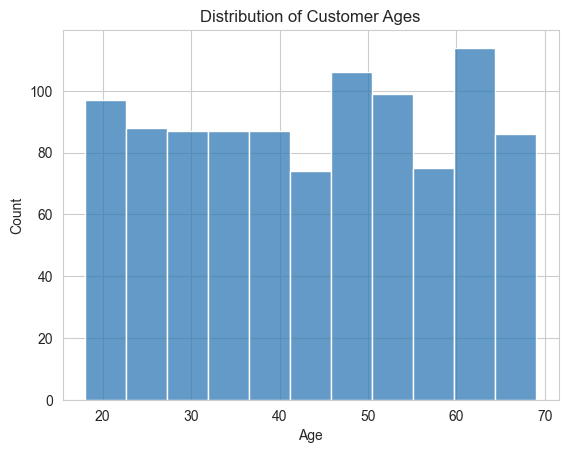

In [72]:
a = sns.histplot(data=df, x='age')
a.set(xlabel='Age', title='Distribution of Customer Ages');

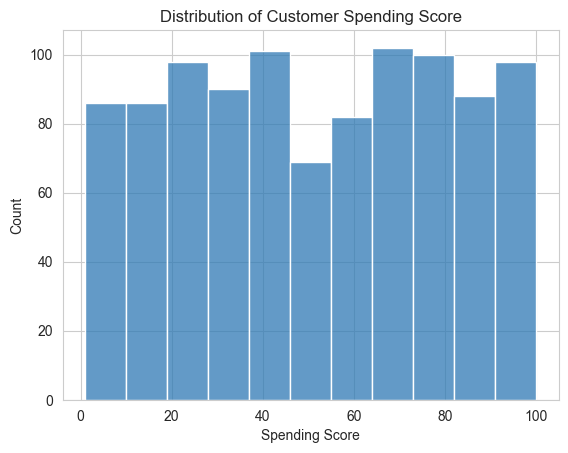

In [74]:
b = sns.histplot(data=df, x='spending_score')
b.set(xlabel='Spending Score', title='Distribution of Customer Spending Score');

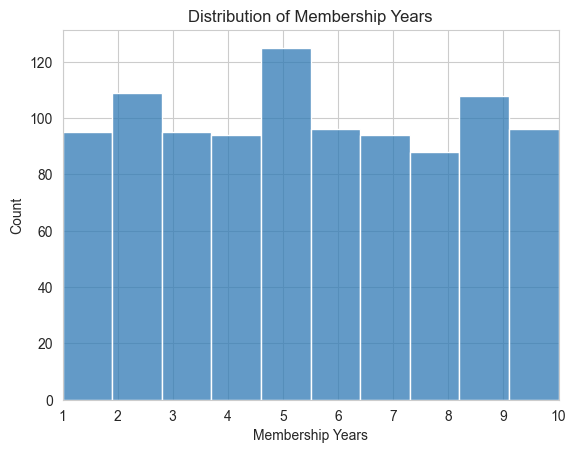

In [133]:
e = sns.histplot(data=df, x='membership_years', bins=10)
e.set(xlabel='Membership Years', title='Distribution of Membership Years',xlim=[1,10]);

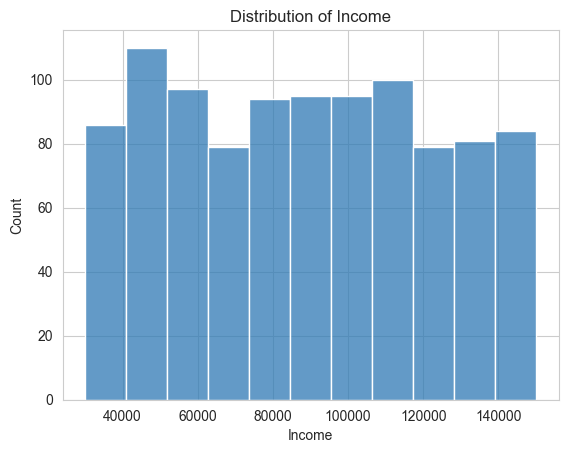

In [117]:
f = sns.histplot(data=df, x='income')
f.set(xlabel='Income', title='Distribution of Income');

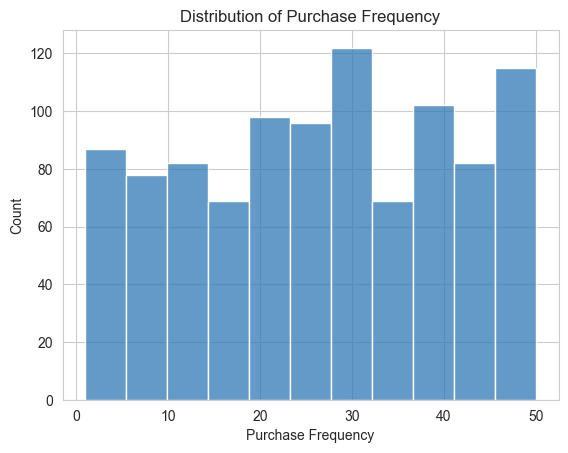

In [121]:
g = sns.histplot(data=df, x='purchase_frequency')
g.set(xlabel='Purchase Frequency', title='Distribution of Purchase Frequency');

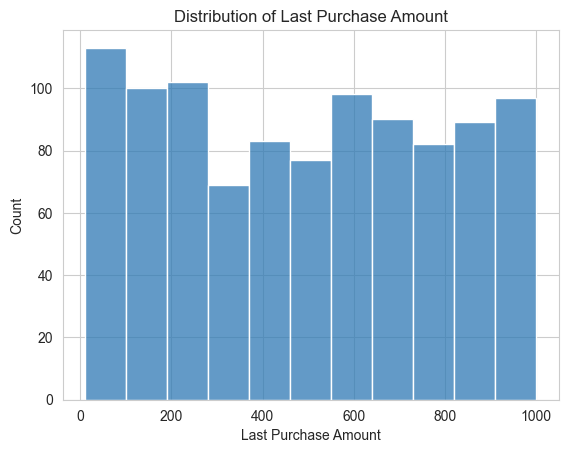

In [123]:
h = sns.histplot(data=df, x='last_purchase_amount')
h.set(xlabel='Last Purchase Amount', title='Distribution of Last Purchase Amount');

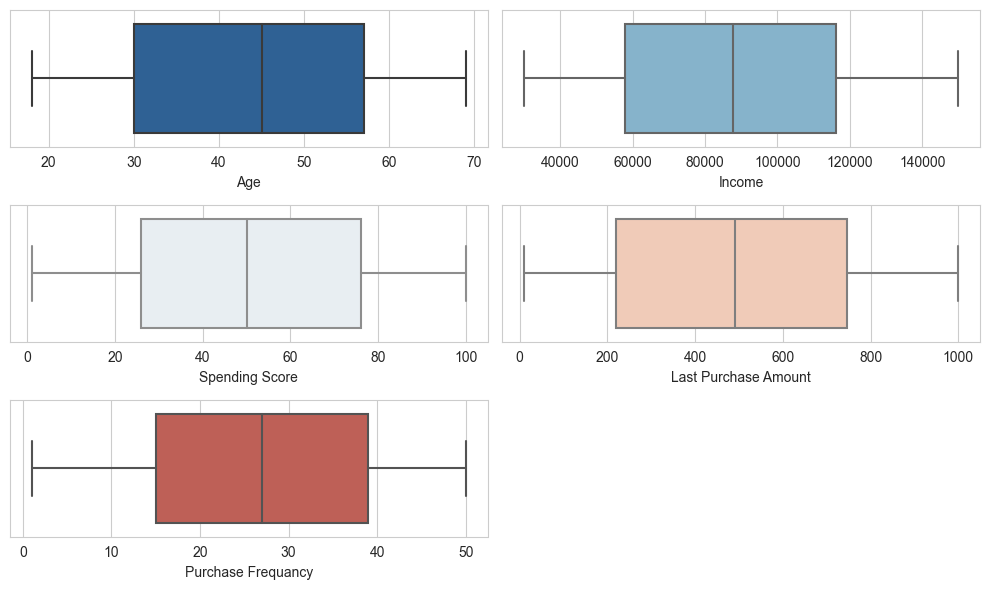

In [157]:
fig, axes = plt.subplots(3, 2, figsize=(10, 6))
axes = axes.flatten() 

aa = sns.boxplot(data=df, x='age', ax=axes[0], color=custom_palette[0])
aa.set(xlabel='Age')
bb = sns.boxplot(data=df, x='income', ax=axes[1], color=custom_palette[2])
bb.set(xlabel='Income')
cc = sns.boxplot(data=df, x='spending_score', ax=axes[2], color=custom_palette[4])
cc.set(xlabel='Spending Score')
dd = sns.boxplot(data=df, x='last_purchase_amount', ax=axes[3], color=custom_palette[6])
dd.set(xlabel='Last Purchase Amount')
ee = sns.boxplot(data=df, x='purchase_frequency', ax=axes[4], color=custom_palette[8])
ee.set(xlabel='Purchase Frequancy')

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

In [159]:
fig.savefig("../assets/cont_var_dist.png", dpi=300, bbox_inches='tight')

There appears to be somewhat evenly distributed continuous variables. There is no skewed data or outliers.

##### Categorical Variables

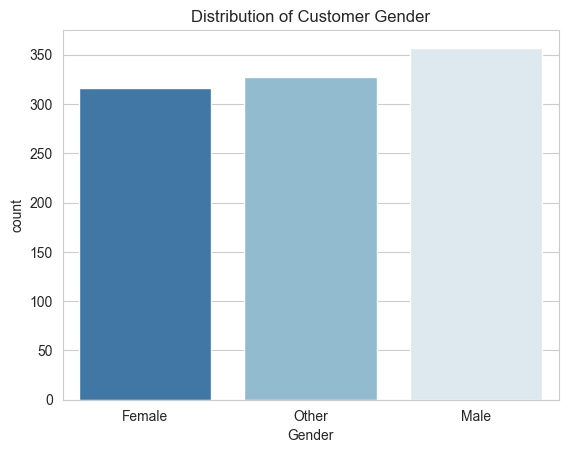

In [76]:
c = sns.countplot(data=df, x='gender')
c.set(xlabel='Gender', title='Distribution of Customer Gender');

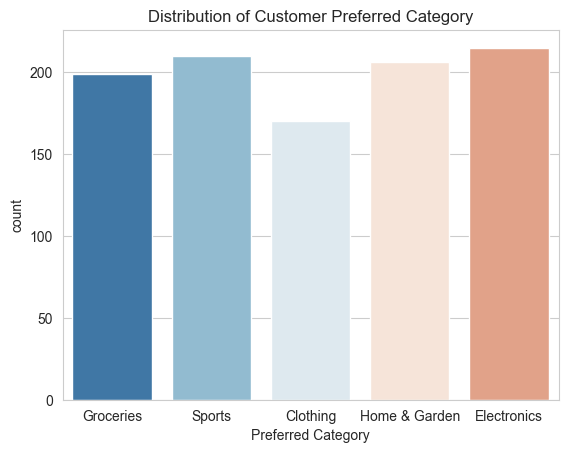

In [113]:
d = sns.countplot(data=df, x='preferred_category')
d.set(xlabel='Preferred Category', title='Distribution of Customer Preferred Category');

All classes in both categorical variables are balanced, with more males for the gender variable and fewer clothing for the preferred category variable.

### Multivariate Analysis

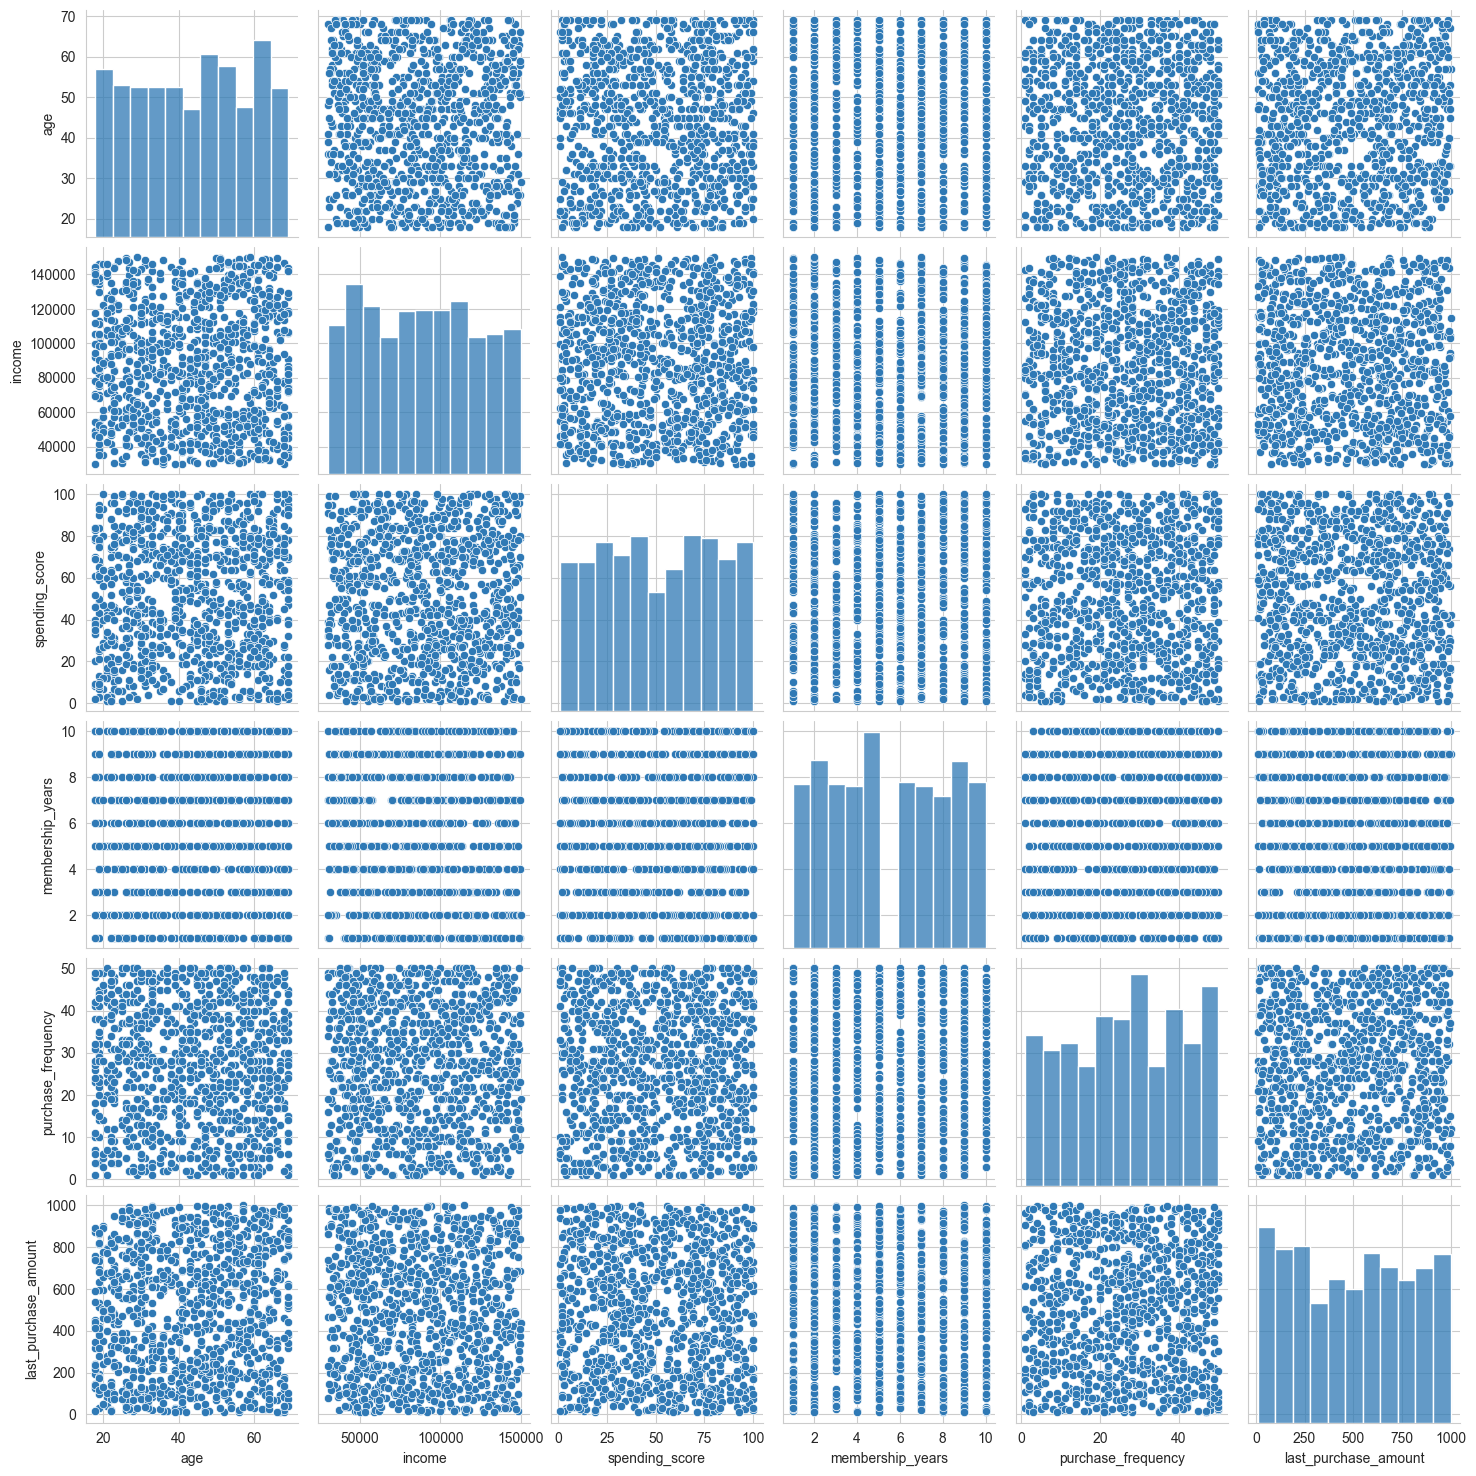

In [78]:
sns.pairplot(data=df);

No clear relationships between variables and there does seem to be any skewed data.

In [82]:
correlation = df.corr(numeric_only=True)

In [84]:
correlation

age    income  spending_score  membership_years  \
age                   1.000000 -0.000688        0.017707         -0.003431   
income               -0.000688  1.000000        0.000020         -0.035783   
spending_score        0.017707  0.000020        1.000000          0.026726   
membership_years     -0.003431 -0.035783        0.026726          1.000000   
purchase_frequency   -0.030137  0.000533        0.006708          0.069532   
last_purchase_amount  0.061599 -0.054006       -0.014475         -0.014135   

                      purchase_frequency  last_purchase_amount  
age                            -0.030137              0.061599  
income                          0.000533             -0.054006  
spending_score                  0.006708             -0.014475  
membership_years                0.069532             -0.014135  
purchase_frequency              1.000000              0.024400  
last_purchase_amount            0.024400              1.000000

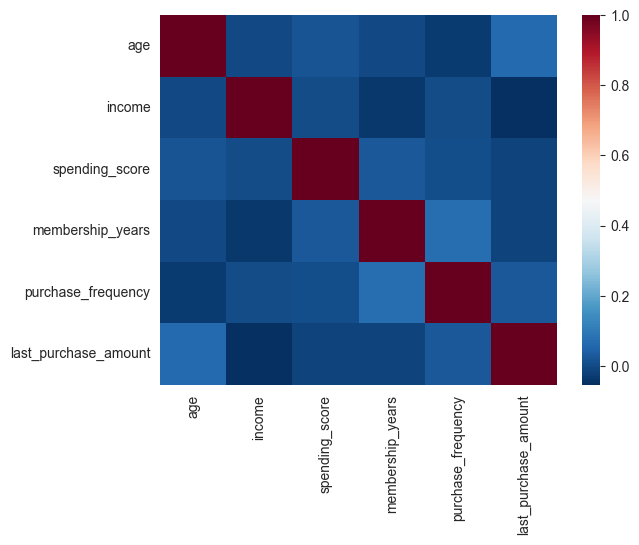

In [88]:
sns.heatmap(data=correlation, cmap='RdBu_r');

There are low correlations between continuous variables, indicating there are no strong relationships between variables.

In [93]:
df['gender'].value_counts()

gender
Male      357
Other     327
Female    316
Name: count, dtype: int64

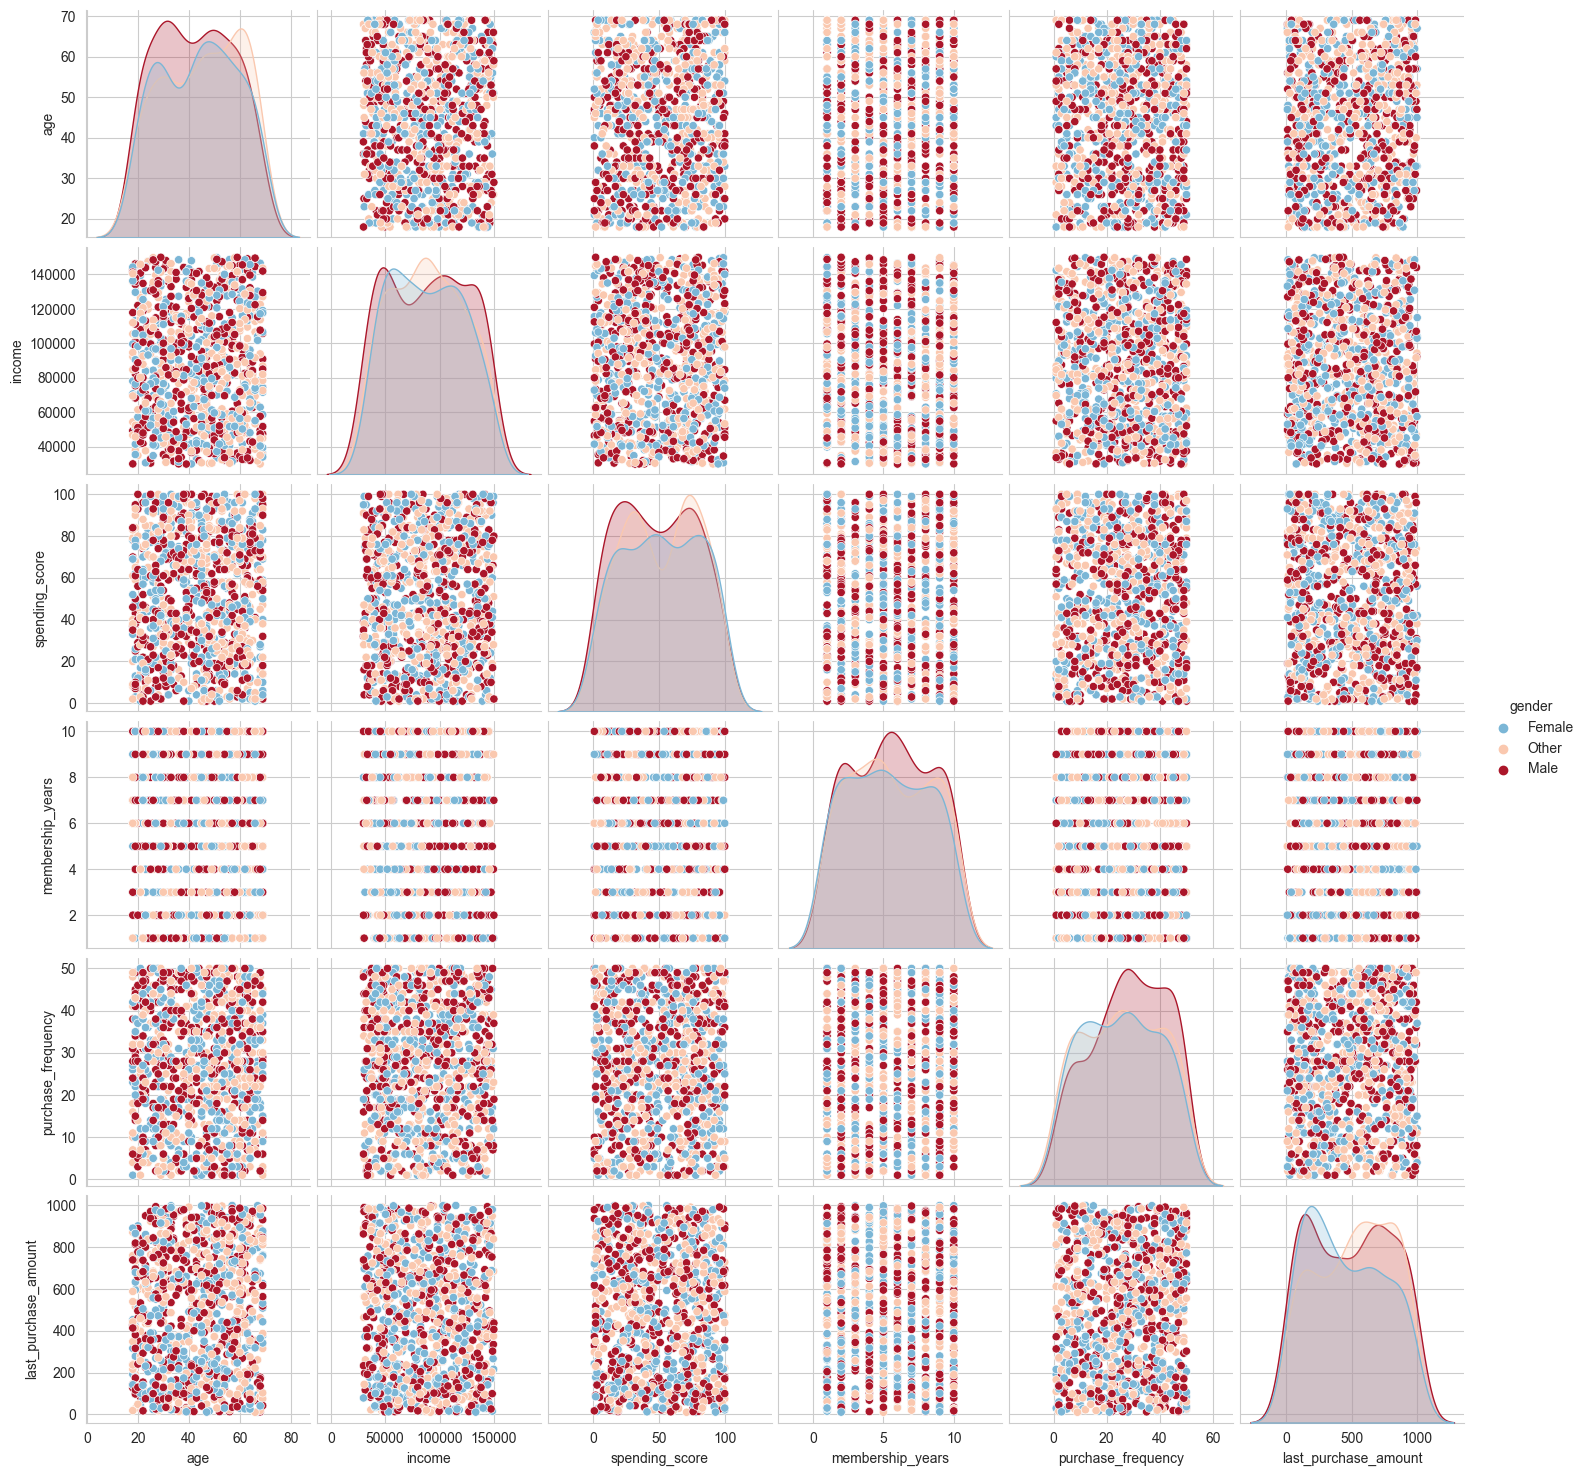

In [105]:
sns.pairplot(data=df, hue='gender', palette=[custom_palette[2], custom_palette[6], custom_palette[9]]);

There do not seem to be any strong relationships between gender and any continuous variable. However, Males tend to have higher purchase frequencies and females tend to have a smaller last purchase amount.

In [97]:
df['preferred_category'].value_counts()

preferred_category
Electronics      215
Sports           210
Home & Garden    206
Groceries        199
Clothing         170
Name: count, dtype: int64

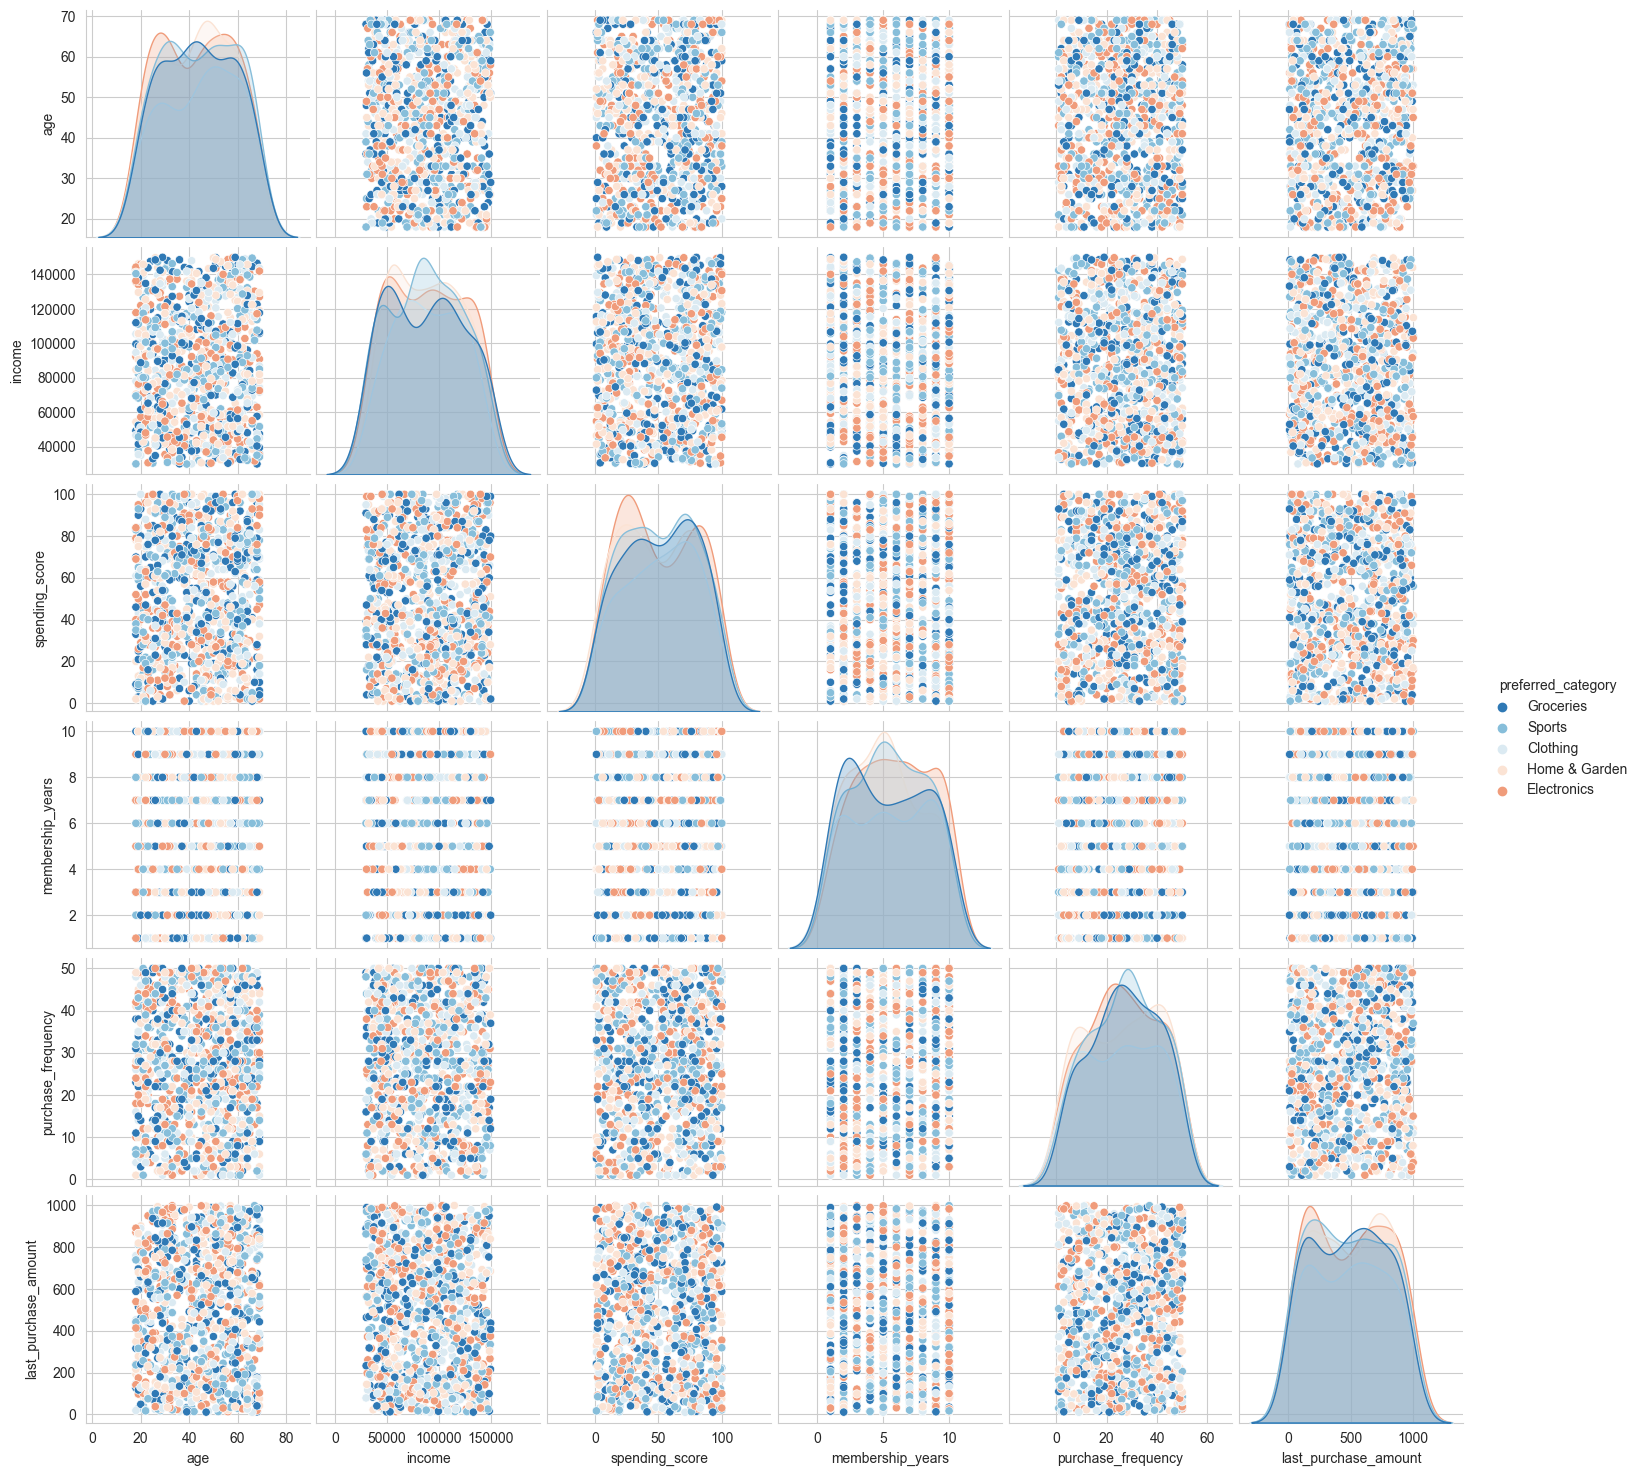

In [109]:
sns.pairplot(data=df, hue='preferred_category');

There do not seem to be any strong relationships between preferred category and any continuous variable.

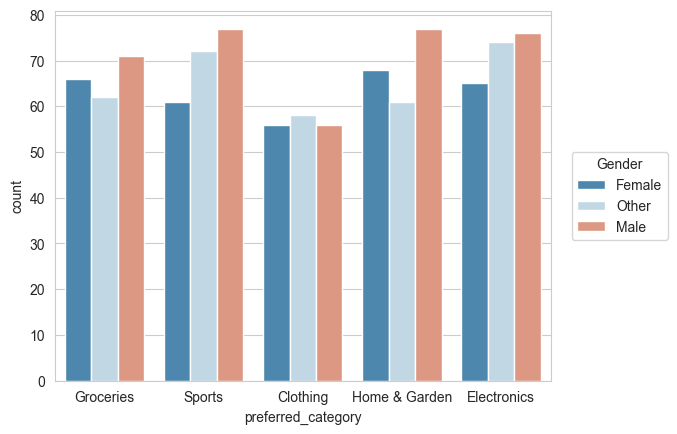

In [200]:
categ = sns.countplot(data=df, x='preferred_category', hue='gender', palette=[custom_palette[1],custom_palette[3],custom_palette[7]])
categ.legend(title='Gender', loc='center right', bbox_to_anchor=(1.25,0.5));

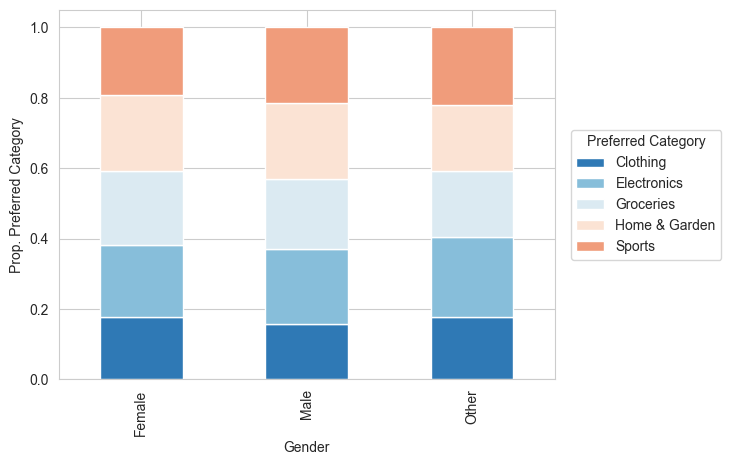

In [222]:
categories = pd.crosstab(df['gender'], df['preferred_category'])
categories = categories.div(categories.sum(axis=1),axis=0)
cat_graph = categories.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Prop. Preferred Category')
plt.legend(title='Preferred Category', loc='center right', bbox_to_anchor=(1.35,0.5));

There is an even distribution of preferred shopping categories amongst the different genders.

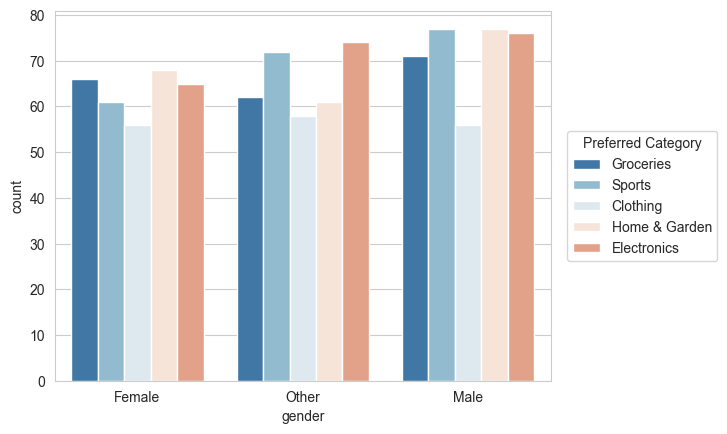

In [192]:
cat = sns.countplot(data=df, hue='preferred_category', x='gender')
cat.legend(title='Preferred Category', loc='center right', bbox_to_anchor=(1.35, 0.5));